In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 

In [93]:
data=pd.read_csv(r"C:\Users\gedel\Downloads\archive (25)\Crop_Recommendation.csv")

In [94]:
datac=data.copy()

In [95]:
datac

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee


In [96]:
datac.head(10)

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,Rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,Rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,Rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,Rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,Rice


In [97]:
datac.columns

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall', 'Crop'],
      dtype='object')

In [98]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [99]:
datac.duplicated().sum()

0

In [100]:
datac["Crop"].value_counts()

Crop
Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: count, dtype: int64

In [101]:
len(datac["Crop"].value_counts())

22

In [102]:
data.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


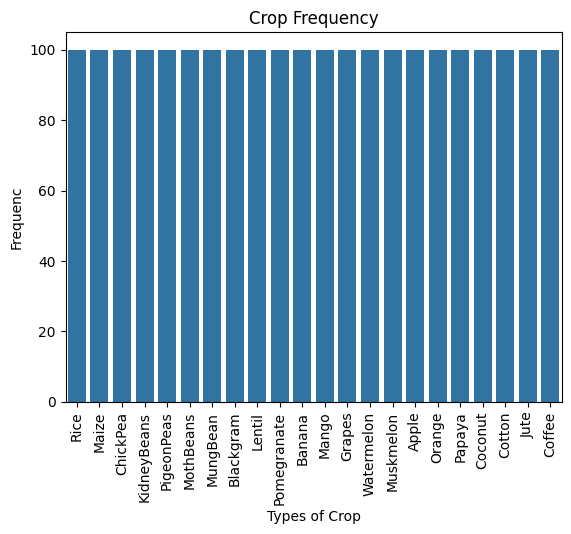

In [103]:
sns.barplot(x=datac["Crop"].unique(),y=datac["Crop"].value_counts().values)
plt.xticks(rotation=90)
plt.title("Crop Frequency")
plt.xlabel("Types of Crop")
plt.ylabel("Frequenc")
plt.show()

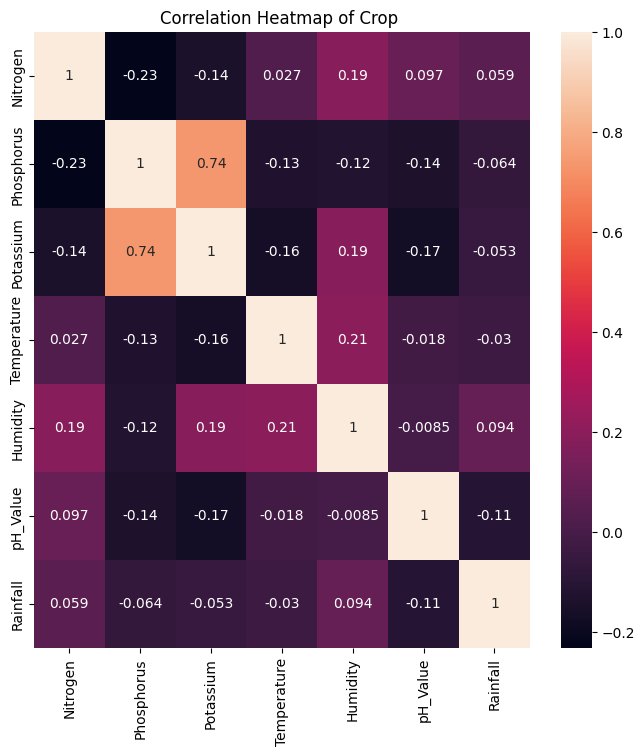

In [104]:
plt.figure(figsize=(8,8))
sns.heatmap(datac.corr(numeric_only=True), annot=True,)
plt.title("Correlation Heatmap of Crop ")
plt.show()

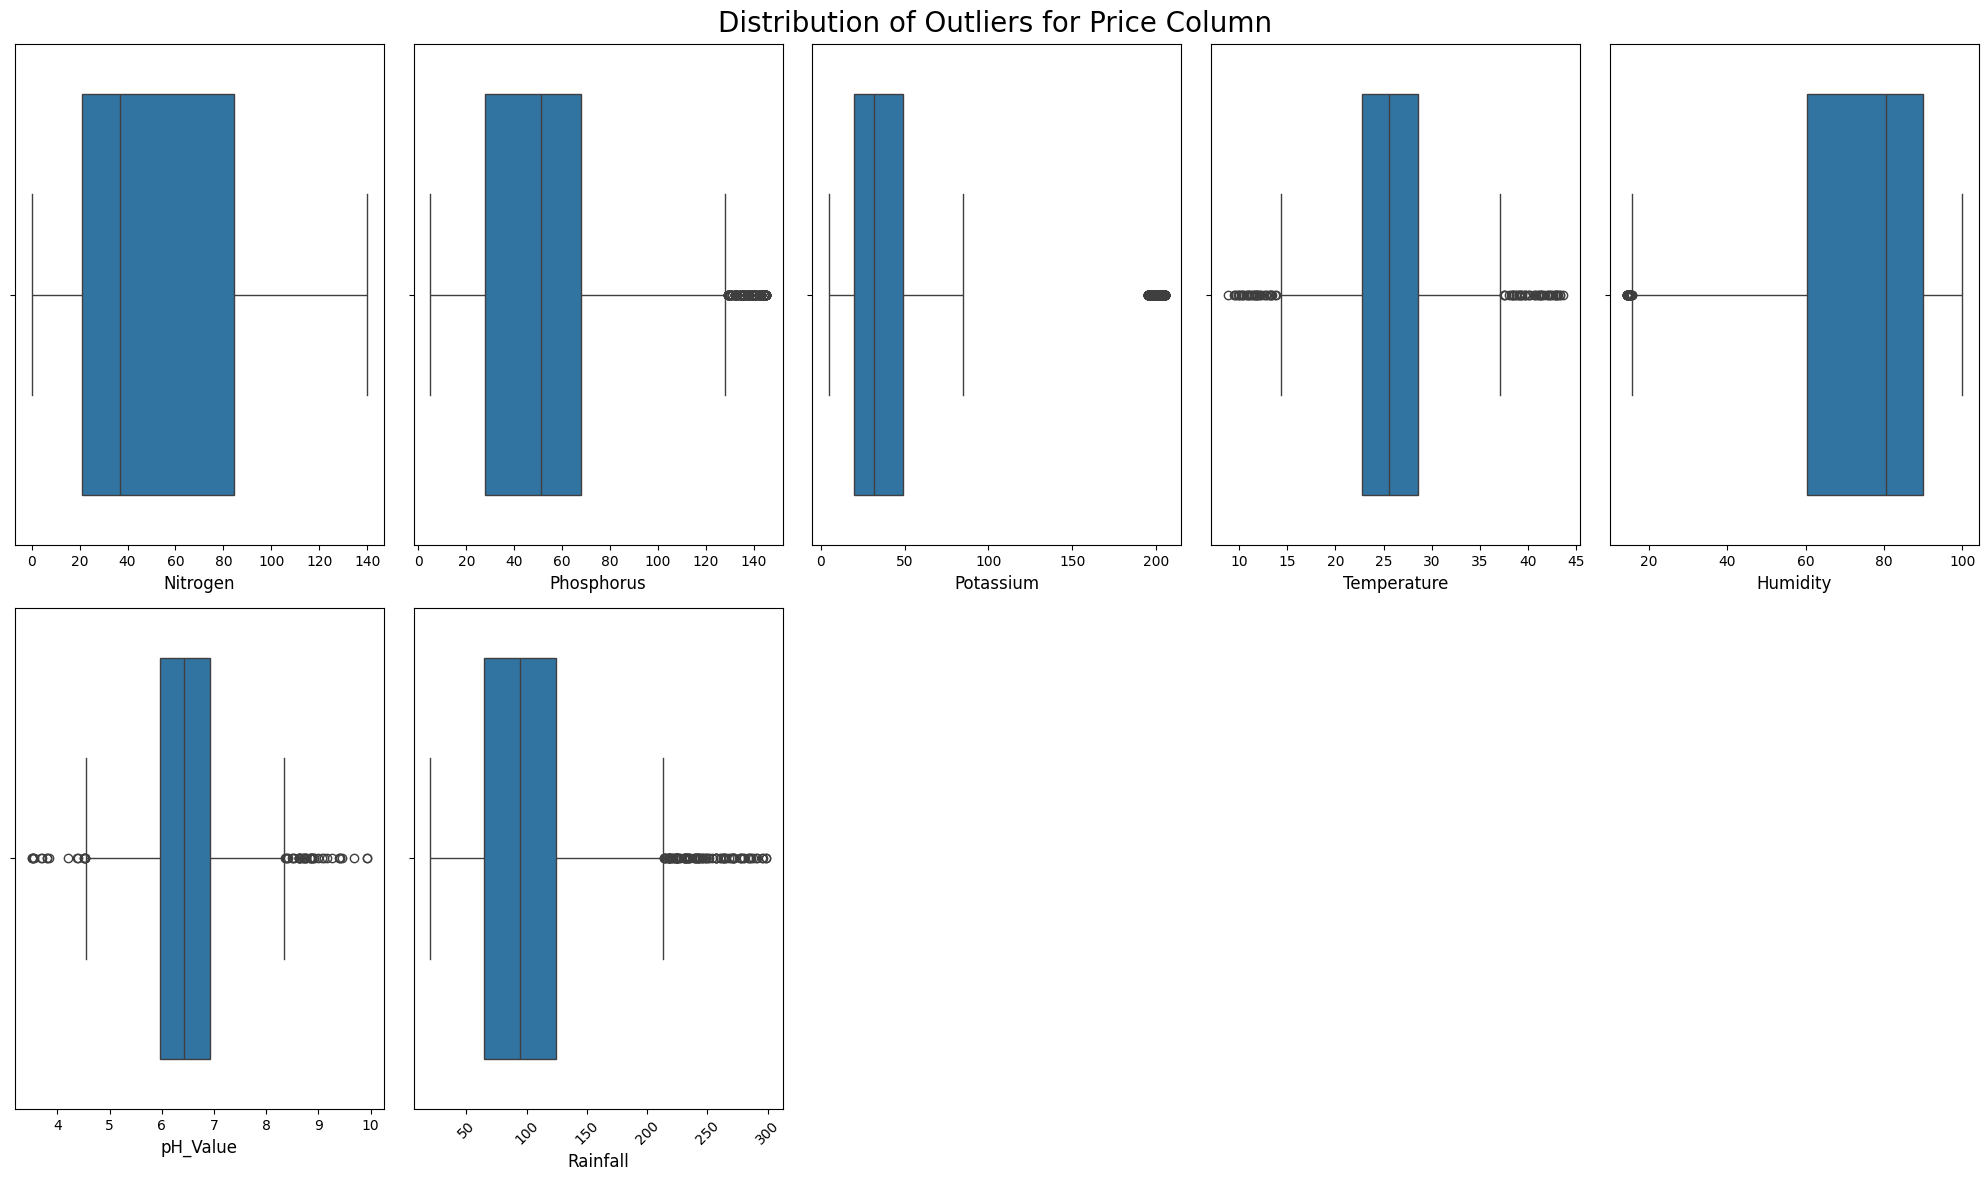

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_data = datac.select_dtypes(include='number')
num_cols = len(numerical_data.columns)

# Define rows and columns dynamically for better spacing
rows = (num_cols // 5) + 1
cols = min(num_cols, 5)

fig, axes = plt.subplots(rows, cols, figsize=(20, 12))
axes = axes.flatten()

for idx, col in enumerate(numerical_data.columns):
    sns.boxplot(x=numerical_data[col], ax=axes[idx])
    axes[idx].set_xlabel(col, fontsize=12)
    axes[idx].set_ylabel('')

# Hide unused subplots
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

fig.suptitle('Distribution of Outliers for Price Column', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [106]:
fv=datac.drop(columns="Crop")

In [107]:
cv=datac.iloc[:,-1]

In [108]:
from sklearn.model_selection import train_test_split, cross_val_score

In [109]:
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,stratify=cv)

In [110]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [111]:
y_train

732       Blackgram
680        MungBean
748       Blackgram
999     Pomegranate
45             Rice
           ...     
117           Maize
2192         Coffee
2034           Jute
1987         Cotton
843          Lentil
Name: Crop, Length: 1760, dtype: object

In [112]:
pre_rs=StandardScaler()
x_train_pro=pre_rs.fit_transform(x_train)
x_test_pro=pre_rs.transform(x_test)

In [113]:
x_test_pro

array([[-0.39319318, -0.46920456, -0.65385743, ...,  0.7237469 ,
        -0.17727186, -0.82498028],
       [ 1.44548772,  0.80630298,  0.11619171, ...,  0.44195252,
        -0.74567878,  0.11923833],
       [ 0.09351647,  0.35076457, -0.02202224, ...,  0.90182276,
         0.3391676 ,  0.83961265],
       ...,
       [ 0.66134439, -0.52994301, -0.08125679, ...,  0.12434547,
         0.19950033,  0.90904622],
       [-1.31253364,  2.02107205,  3.05817433, ...,  1.04382553,
        -0.72717542,  0.09185714],
       [ 0.85062037, -0.31735842, -0.19972589, ...,  0.44636849,
        -1.74146145,  2.51309389]])

In [23]:
from sklearn.preprocessing import OneHotEncoder

# Assuming y_train is a pandas Series
y_train_reshaped = y_train.values.reshape(-1, 1)  # Reshape to a 2D array
y_test_reshaped = y_test.values.reshape(-1, 1)

# Initialize OneHotEncoder
on = OneHotEncoder(sparse_output=False)

# Fit and transform the reshaped y_train
y_train_encoded = on.fit_transform(y_train_reshaped)
y_test_encoded = on.transform(y_test_reshaped)
# Now you can create the DataFrame with the correct column names
encoded_columns = on.get_feature_names_out(["Crop"])
encoded_y_train = pd.DataFrame(y_train_encoded, columns=encoded_columns)
encoded_y_test = pd.DataFrame(y_test_encoded, columns=encoded_columns)
encoded_y_train

,Crop_Apple,Crop_Banana,Crop_Blackgram,Crop_ChickPea,Crop_Coconut,Crop_Coffee,Crop_Cotton,Crop_Grapes,Crop_Jute,Crop_KidneyBeans,...,Crop_Mango,Crop_MothBeans,Crop_MungBean,Crop_Muskmelon,Crop_Orange,Crop_Papaya,Crop_PigeonPeas,Crop_Pomegranate,Crop_Rice,Crop_Watermelon
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
import optuna

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate



In [115]:
def objective(trail):
  algo=trail.suggest_categorical('algo',['knn','dt','lor'])
  if algo=="knn":
    k=n_neighbors=trail.suggest_int('k',3,100)
    weights=trail.suggest_categorical('weights',['uniform','distance'])
    p1=trail.suggest_int("distance",1,2)
    alg=trail.suggest_categorical("algorithm",["ball_tree","kd_tree","brute"])
    model=KNeighborsClassifier(n_neighbors=k,weights=weights,p=p1,algorithm=alg)
    model.fit(x_train_pro,y_train)
  elif algo=="dt":
    max_depth=trail.suggest_int("max_depth",1,50)
    min_samples_split=trail.suggest_int("min_samples_split",2,50)
    min_samples_leaf=trail.suggest_int("min_samples_leaf",1,50)
    min_weight_fraction_leaf=trail.suggest_float("min_weight_fraction_leaf",0.0,0.15)
    min_impurity_decrease=trail.suggest_float("min_impurity_decrease",0.0,1.0)
    max_features=trail.suggest_int("max_features",1,7)
    model=DecisionTreeClassifier(max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,min_weight_fraction_leaf=min_weight_fraction_leaf,min_impurity_decrease=min_impurity_decrease,max_features=max_features)
    model.fit(x_train_pro,y_train)
  elif algo=="lor":

    solver = trail.suggest_categorical('solver', ["liblinear", "newton-cholesky"])
    penalty = trail.suggest_categorical('penalty', ["l1", "l2"]) if solver == "liblinear" else "l2"
    c = trail.suggest_categorical("c", [0.001, 0.01, 0.1, 10, 100])

    model = LogisticRegression(solver=solver, penalty=penalty, C=c)
    model.fit(x_train_pro,y_train)

  cv_score=cross_validate(model,x_train_pro,y_train,cv=3,scoring="neg_log_loss",return_train_score=True)['test_score'].mean()
  train_score=cross_validate(model,x_train_pro,y_train,cv=3,scoring="neg_log_loss",return_train_score=True)['train_score'].mean()
  trail.set_user_attr(key="cv_score",value=cv_score)
  trail.set_user_attr(key="train_score",value=train_score)
  return cv_score

In [116]:
st1=optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler())

[I 2025-03-21 21:14:11,185] A new study created in memory with name: no-name-c9c64066-c605-48ab-b760-ef8e50cead96


In [122]:
st1.optimize(objective,n_trials=100)

[I 2025-03-21 21:19:46,866] Trial 0 finished with value: -0.5785966254578897 and parameters: {'algo': 'knn', 'k': 88, 'weights': 'distance', 'distance': 2, 'algorithm': 'brute'}. Best is trial 0 with value: -0.5785966254578897.
[I 2025-03-21 21:19:47,052] Trial 1 finished with value: -3.0912367245590224 and parameters: {'algo': 'dt', 'max_depth': 46, 'min_samples_split': 25, 'min_samples_leaf': 33, 'min_weight_fraction_leaf': 0.10464199532710147, 'min_impurity_decrease': 0.3909574910886138, 'max_features': 3}. Best is trial 0 with value: -0.5785966254578897.
[I 2025-03-21 21:19:48,066] Trial 2 finished with value: -2.828508206841954 and parameters: {'algo': 'lor', 'solver': 'newton-cholesky', 'c': 0.001}. Best is trial 0 with value: -0.5785966254578897.
[I 2025-03-21 21:19:48,319] Trial 3 finished with value: -2.969208279212157 and parameters: {'algo': 'lor', 'solver': 'liblinear', 'penalty': 'l1', 'c': 0.01}. Best is trial 0 with value: -0.5785966254578897.
[I 2025-03-21 21:19:48,461]

In [123]:
st1.best_params

{'algo': 'lor', 'solver': 'newton-cholesky', 'c': 100}

In [125]:
st1.best_value

-0.061826421046909996

In [126]:
lr=LogisticRegression(solver='newton-cholesky', C= 100)
lr.fit(x_train_pro,y_train)

LogisticRegression(C=100, solver='newton-cholesky')

In [127]:
accuracy_score(y_test,lr.predict(x_test_pro))

0.9772727272727273

from sklearn.metrics import accuracy_score,log_loss

# Train the model on full training data

best_model1 = RandomForestClassifier(
    n_estimators=42,
    max_depth=13,
    min_samples_leaf=2,
    min_impurity_decrease= 0.010222607828117798,
    min_samples_split=2,)  # Fixed issue
mo=best_model1.fit(x_train_pro, y_train)
y_cap=best_model.predict(x_test_pro)
from sklearn.metrics import accuracy_score
ac_sc = accuracy_score(y_test, y_cap)
print(ac_sc)

from sklearn.metrics import accuracy_score,lo

# Train the model on full training data

best_model = RandomForestClassifier(
    n_estimators=94,
    max_depth=24,
    min_samples_leaf=3,
    min_impurity_decrease=0.010103048995498968,
    min_samples_split=2,  # Fixed issue
    random_state=42)

best_model.fit(x_train_pro, y_train)
y_cap=best_model.predict(x_test_pro)
from sklearn.metrics import accuracy_score
ac_sc = accuracy_score(y_test, y_cap)
print(ac_sc)

In [128]:
from sklearn.metrics import accuracy_score

y_cap_prob = lr.predict(x_test) # Ensure this returns probability values
log_loss_value = log_loss(y_test, y_cap_prob)

y_cap = best_model.predict_proba(x_test)  # Get probability distributions instead of class labels

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(best_model, x_train_pro, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")


In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    best_model, x_train_pro, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()


max_depth: Controls the depth (complexity) of the tree.
min_samples_split: Sets the minimum samples required to split an internal node.
min_samples_leaf: Defines the minimum samples for a leaf node.
criterion: The method to evaluate splits (e.g., Gini impurity or entropy).
max_features: Controls the number of features to consider for splits.
class_weight: Useful in imbalanced classification tasks to assign different importance to classes.

How to Interpret the Results
Overfitting (High Variance)

Train Score: High (e.g., 95%+)
Validation Score: Low (e.g., 60%-70%)
Large gap between train and validation scores (e.g., 30%+ difference)
Fixes:

Reduce model complexity (e.g., lower max_depth for trees, decrease n_estimators for RandomForest)
Add regularization (e.g., increase C for LogisticRegression)
Use more training data
Underfitting (High Bias)
Train Score: Low (e.g., below 75%)
Validation Score: Low (similar to train score)
Both scores are close but low
Fixes:

Increase model complexity (e.g., higher max_depth, more n_estimators)
Reduce regularization (e.g., decrease C for LogisticRegression)
Feature engineering: Add more relevant features
Good Fit (Balanced)

Train Score: High (80%-90%)
Validation Score: Similar (within 5-10% of train score)
Small gap between train and validation scores
This means the model generalizes well.

In [130]:
from sklearn.pipeline import Pipeline

In [131]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [132]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

numa_pl = Pipeline(steps=[("Scaling", StandardScaler())])

#categorical_pl = Pipeline(steps=[("Encoding", OneHotEncoder(drop="first", sparse_output=False))])
ct = ColumnTransformer(transformers=[("num", numa_pl, [0, 1, 2, 3, 4, 5, 6])])

In [133]:
ct

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('Scaling',
                                                  StandardScaler())]),
                                 [0, 1, 2, 3, 4, 5, 6])])

In [134]:
from sklearn.pipeline import Pipeline

final_pl = Pipeline(steps=[("transformation", ct), ("estimator",lr)])


In [135]:
from sklearn.model_selection import train_test_split

# Ensure fv and cv are correctly assigned
x_train, x_test, y_train, y_test = train_test_split(fv, cv, test_size=0.3, shuffle=True)


In [136]:
final_pl

Pipeline(steps=[('transformation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Scaling',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6])])),
                ('estimator',
                 LogisticRegression(C=100, solver='newton-cholesky'))])

In [137]:
y_pred=final_pl.fit(x_train,y_train)
y_pred

Pipeline(steps=[('transformation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Scaling',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6])])),
                ('estimator',
                 LogisticRegression(C=100, solver='newton-cholesky'))])

In [138]:
y_c=y_pred.predict(x_test)

In [139]:
accuracy_score(y_test,y_c)

0.9924242424242424

In [140]:
import pickle

In [141]:
pickle.dump(final_pl,open("lor_f.pkl","wb"))

In [142]:
!pip freeze > requirements.txt

In [144]:
import pickle
with open("lor_f.pkl", "wb") as f:
    lr=LogisticRegression(solver='newton-cholesky', C= 100)
    lr.fit(x_train,y_train)
    
    pickle.dump(lr, f)


In [145]:
import pickle
# Load model (now it should work fine!)

model = pickle.load(open("lor_f.pkl", "rb"))

In [ ]:
def objective(trial):

  var1=trial.suggest_categorical('var1',[("liblinear","l1"),("liblinear","l2"),("newton-cholesky","l2")])
  c=trial.suggest_categorical("c",[0.001,0.01,0.1,1,10,100])


  lor=LogisticRegression(solver=var1[0],penalty=var1[1],C=c,random_state=1)


  return cross_validate(lor,x_train,y_train,cv=5,scoring='accuracy')["test_score"].mean()

In [ ]:
lor=LogisticRegression(solver=var1[0],penalty=var1[1],C=c,random_state=1)
        C = trial.suggest_float("C", 0.01, 10.0, log=True)
        penalty = trial.suggest_categorical('penalty', ['l1', 'l2', 'elasticnet'])
        solver = trial.suggest_categorical('solver', ['liblinear', 'lbfgs', 'saga'])
        max_iter = trial.suggest_int('max_iter', 100, 1000)
        multi_class = trial.suggest_categorical('multi_class', ['ovr', 'multinomial'])
        model = LogisticRegression(C=C,max_iter=max_iter,solver=solver, multi_class = multi_class)